# Data Exploration on Weather Dataset
In this section the aim is to understand insights on the data and how are the features related to each other. This will help us to understand the data better and also help us to decide which features to use for our model. More over it is useful to understand the correlation between the features and the target variable.


In [522]:
# importing useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [523]:
#importing data

df = pd.read_csv('../data/weather.csv')
print(df.head())
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.describe())

   Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0           0  2008-12-01   Albury     13.4     22.9       0.6          NaN   
1           1  2008-12-02   Albury      7.4     25.1       0.0          NaN   
2           2  2008-12-03   Albury     12.9     25.7       0.0          NaN   
3           3  2008-12-04   Albury      9.2     28.0       0.0          NaN   
4           4  2008-12-05   Albury     17.5     32.3       1.0          NaN   

   Sunshine WindGustDir  WindGustSpeed  ... Humidity9am Humidity3pm  \
0       NaN           W           44.0  ...        71.0        22.0   
1       NaN         WNW           44.0  ...        44.0        25.0   
2       NaN         WSW           46.0  ...        38.0        30.0   
3       NaN          NE           24.0  ...        45.0        16.0   
4       NaN           W           41.0  ...        82.0        33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

<Axes: xlabel='RainTomorrow', ylabel='count'>

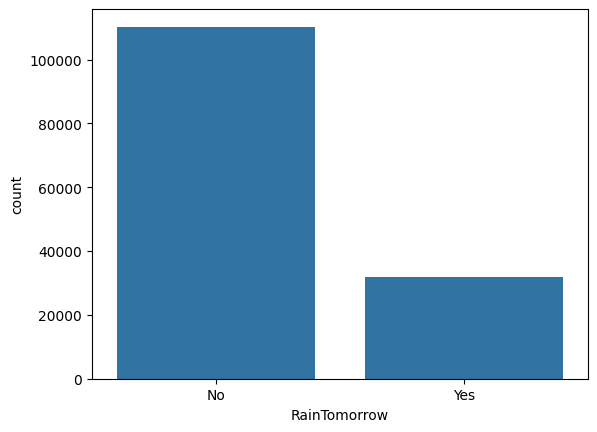

In [524]:
sns.countplot(x='RainTomorrow', data=df)

In [525]:
df['RainTomorrow'].describe()

count     142193
unique         2
top           No
freq      110316
Name: RainTomorrow, dtype: object

In [526]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

## Analyzing data correlation

In [527]:
''' 
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
'''


' \nDate              object\nLocation          object\nMinTemp          float64\nMaxTemp          float64\nRainfall         float64\nEvaporation      float64\nSunshine         float64\nWindGustDir       object\nWindGustSpeed    float64\nWindDir9am        object\nWindDir3pm        object\nWindSpeed9am     float64\nWindSpeed3pm     float64\nHumidity9am      float64\nHumidity3pm      float64\nPressure9am      float64\nPressure3pm      float64\nCloud9am         float64\nCloud3pm         float64\nTemp9am          float64\nTemp3pm          float64\nRainToday         object\nRainTomorrow      object\n'

MinTemp


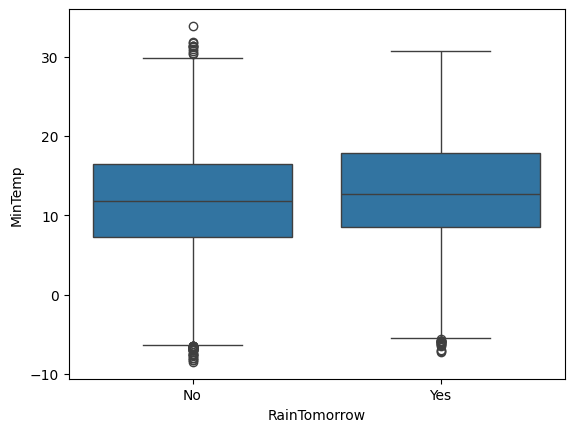

MaxTemp


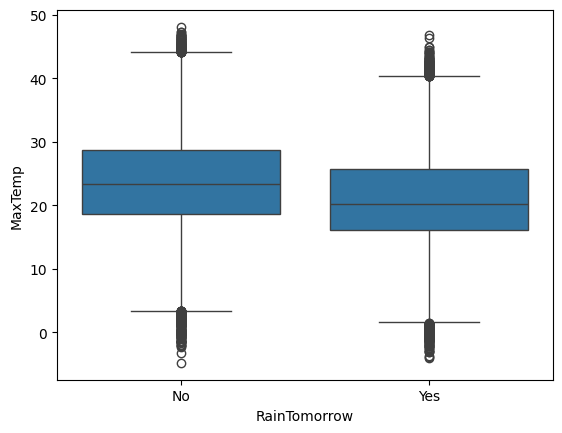

Rainfall


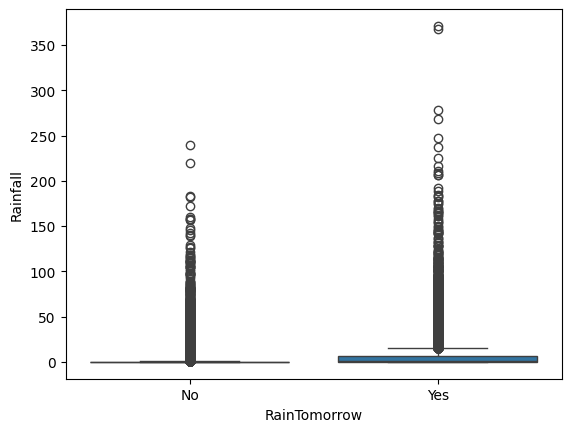

Evaporation


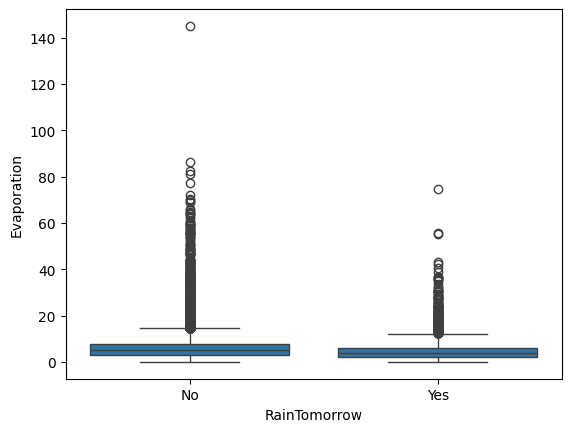

Sunshine


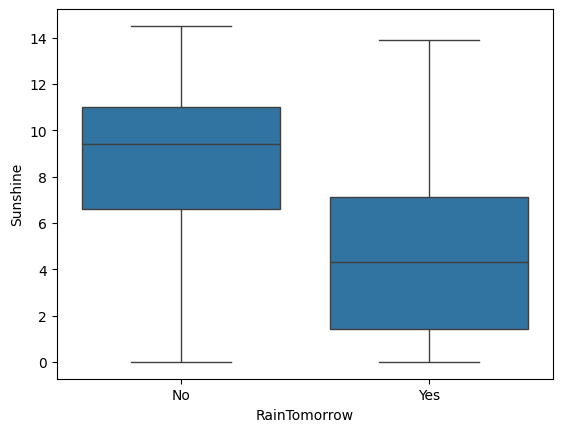

object WindGustDir


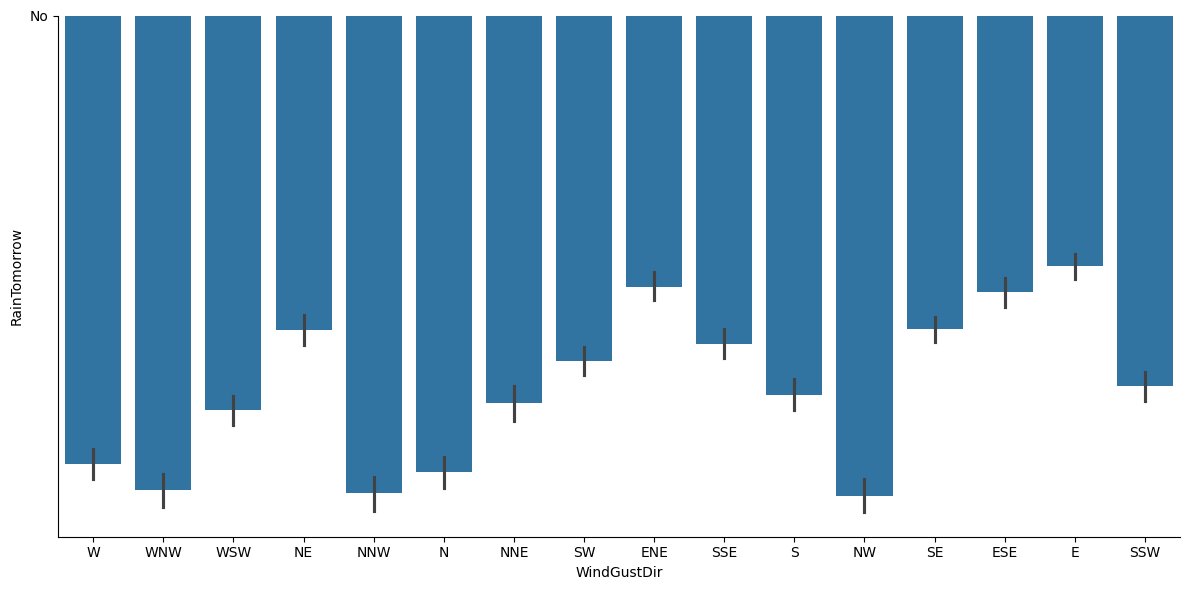

WindGustSpeed


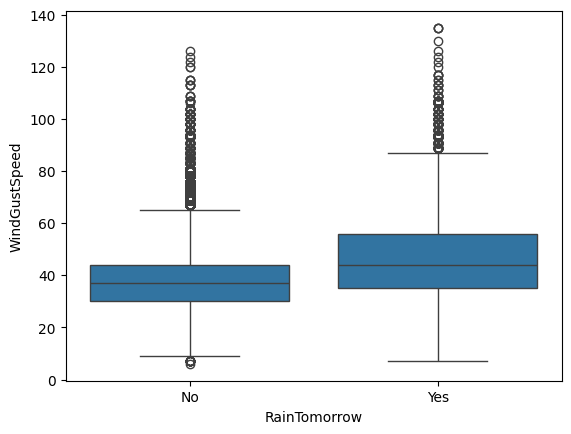

object WindDir9am


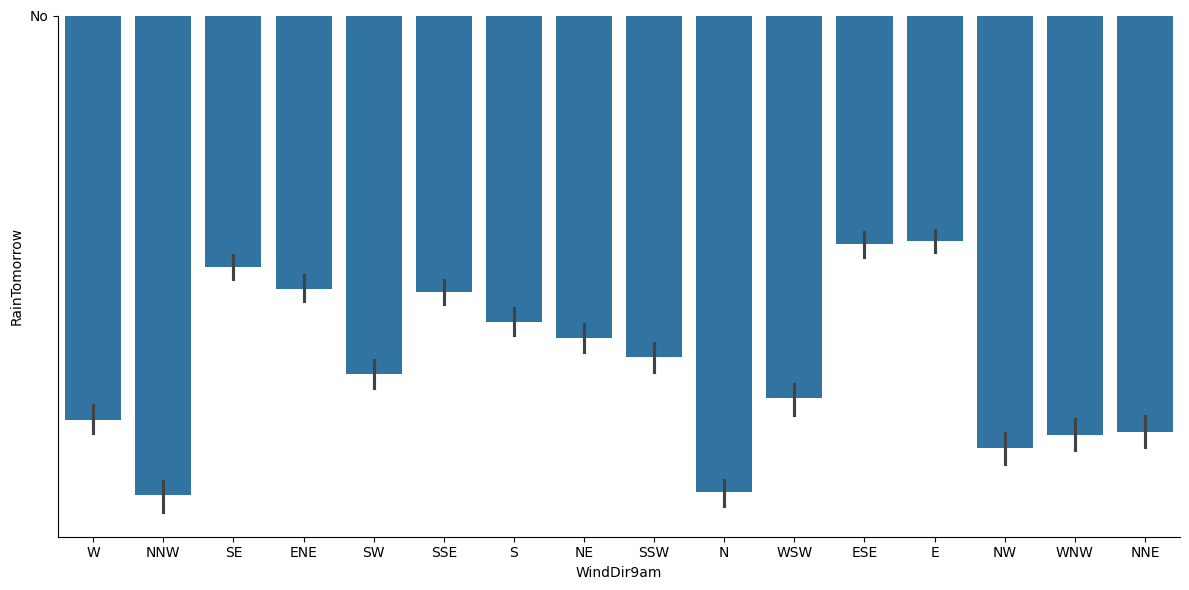

object WindDir3pm


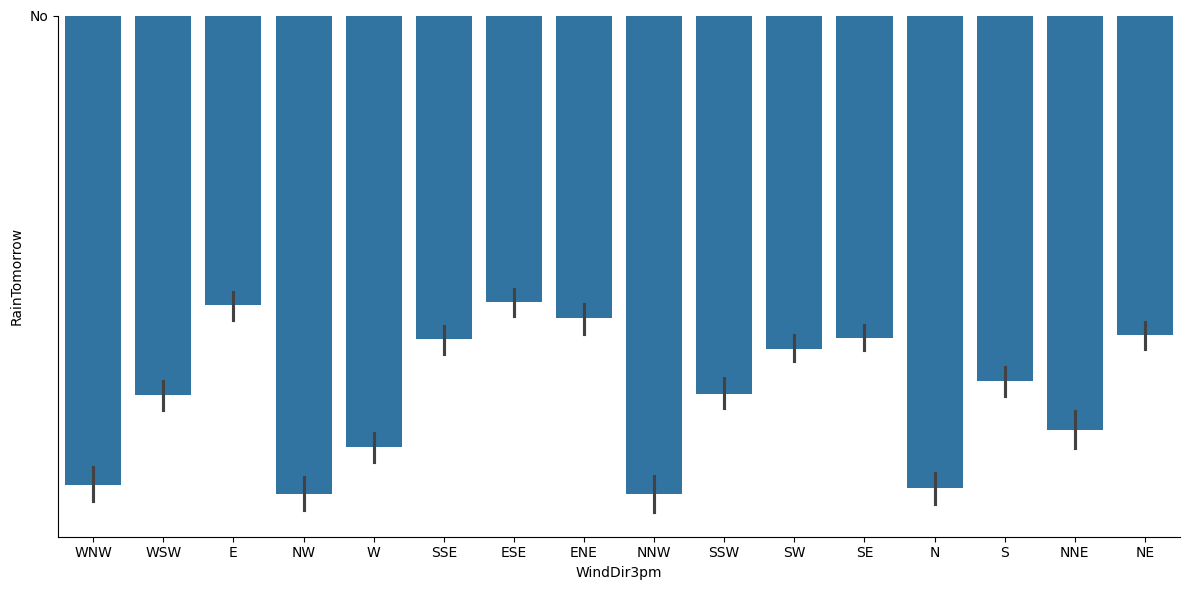

WindSpeed9am


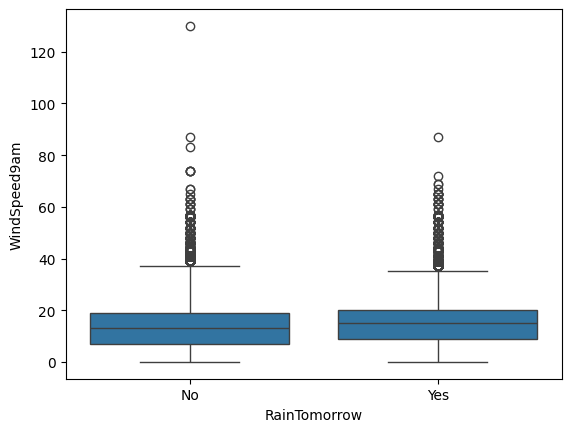

WindSpeed3pm


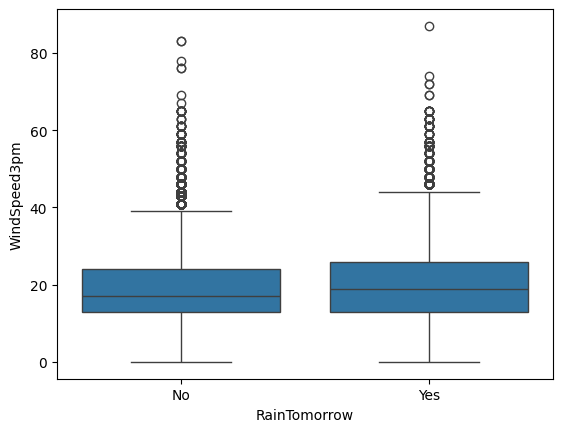

Humidity9am


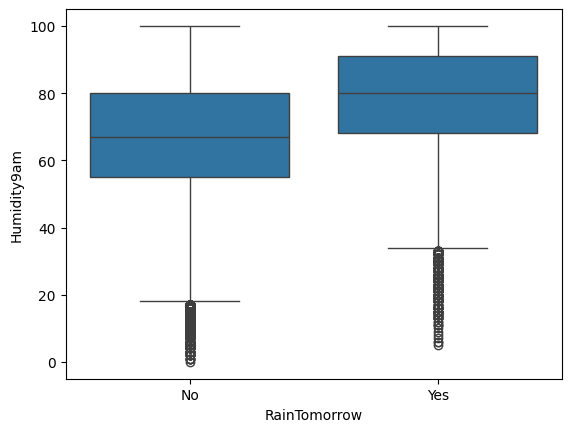

Humidity3pm


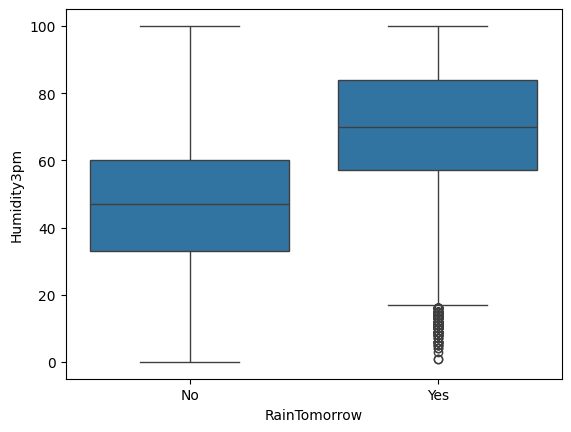

Pressure9am


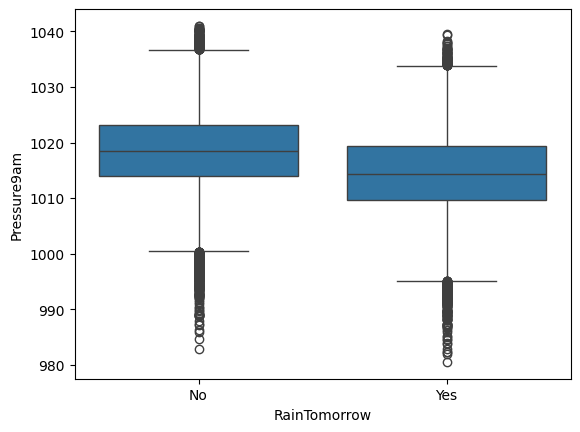

Pressure3pm


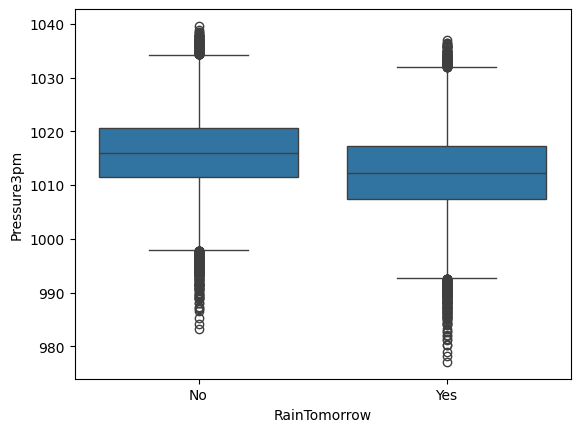

Cloud9am


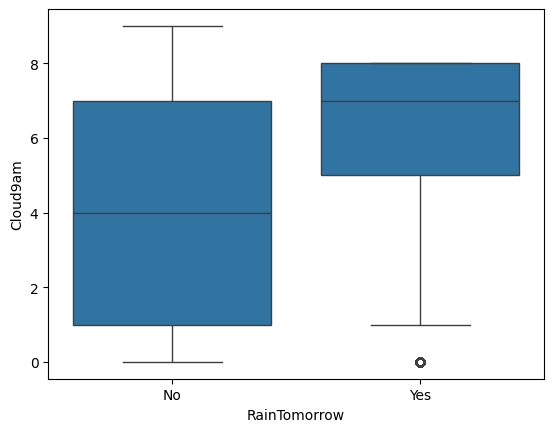

Cloud3pm


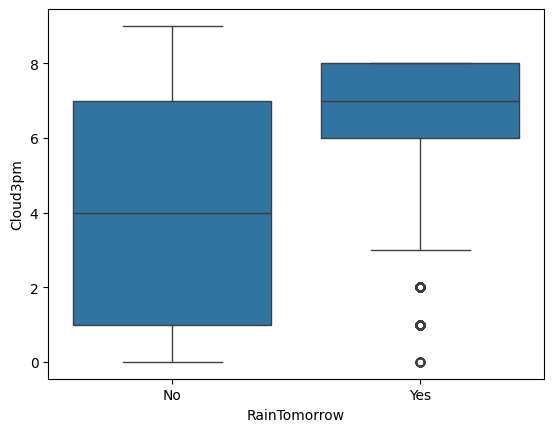

Temp9am


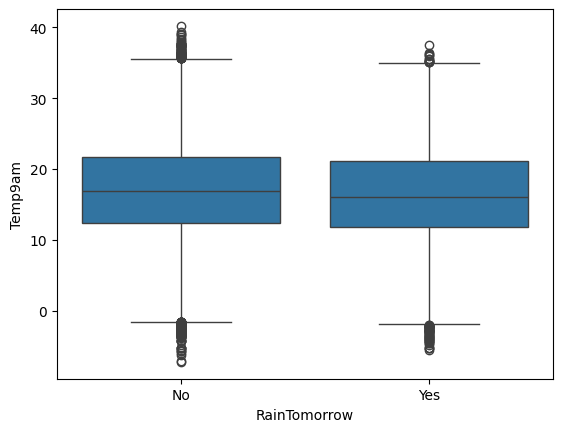

Temp3pm


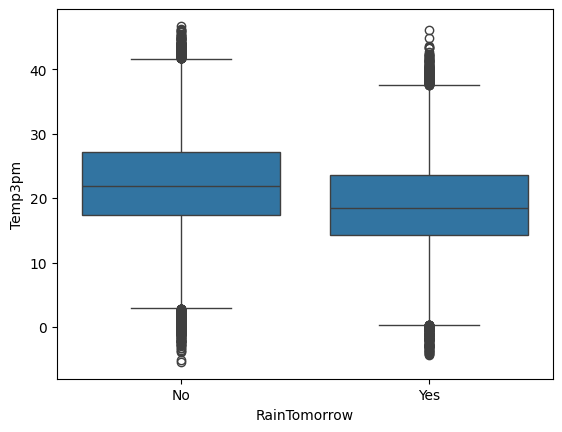

object RainToday


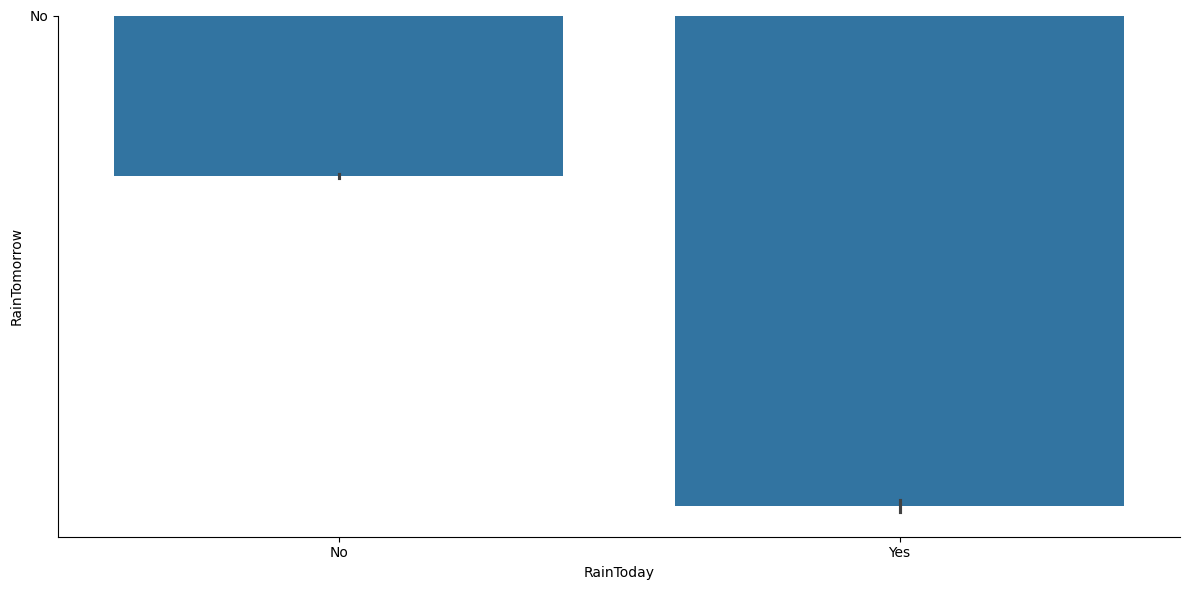

In [528]:
for col in df.columns:
    if col == 'Date' or col == 'Location' or col == 'RainTomorrow' or col== 'Unnamed: 0':
        continue
    
    if df[col].dtype == 'object':
        print(df[col].dtype,col)
        sns.catplot(x=col, y='RainTomorrow', data=df, kind='bar', height=6, aspect=2)
        plt.show()
    else:
        print(col)
        plt.show()
        sns.boxplot(x='RainTomorrow', y=col, data=df)
        plt.show()

## Analyzing data correlation
over numerical variables

<Axes: >

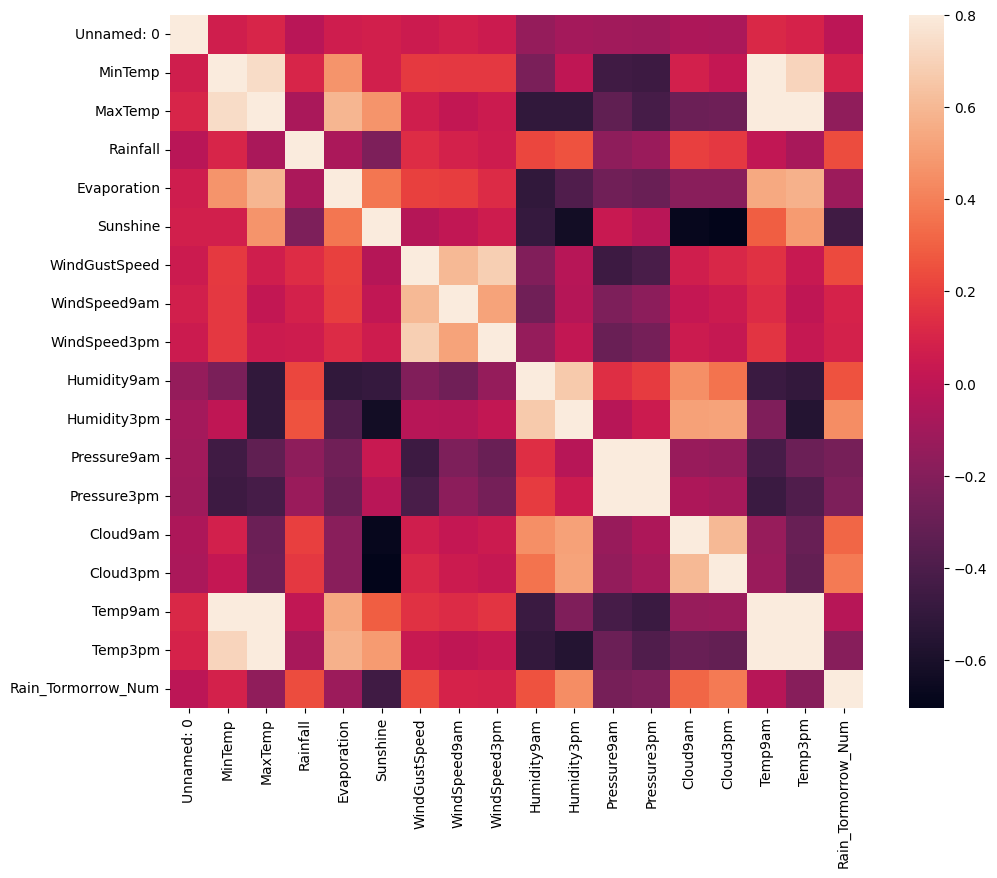

In [529]:
df['Rain_Tormorrow_Num'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_num = df.select_dtypes(include = ['float64', 'int64'])
corrmat = df_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

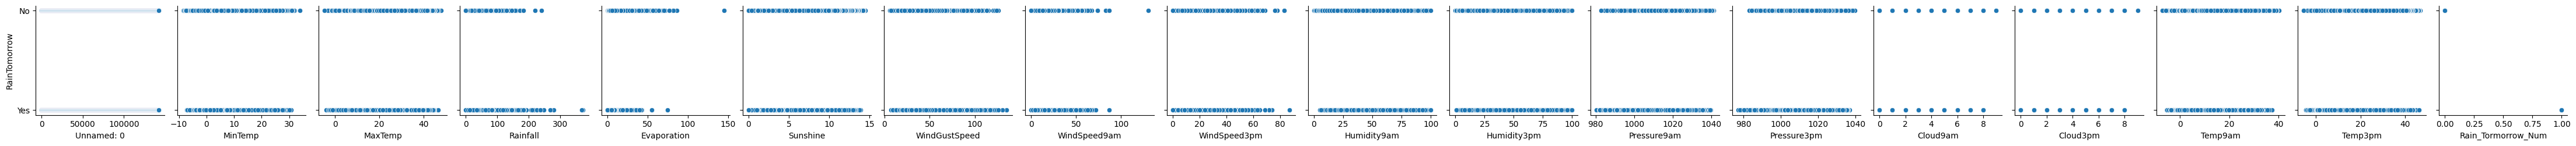

In [530]:
sns.pairplot(df, y_vars='RainTomorrow')

## Analyzing null data

<Axes: >

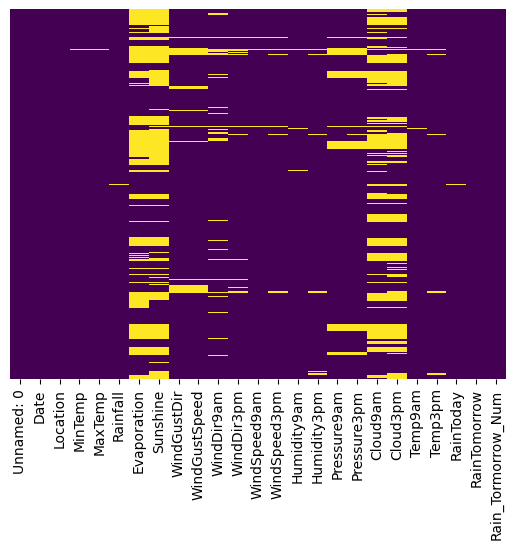

In [531]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [532]:
nan_total = df.isnull().sum().sort_values(ascending=False)
nan_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([nan_total, nan_percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Sunshine,67816,0.476929
Evaporation,60843,0.427890
Cloud3pm,57094,0.401525
Cloud9am,53657,0.377353
Pressure9am,14014,0.098556
Pressure3pm,13981,0.098324
WindDir9am,10013,0.070418
WindGustDir,9330,0.065615
WindGustSpeed,9270,0.065193
WindDir3pm,3778,0.026570


Based on correlation evaluations, we have sunshine wich effect the rain fall, while the other variables with Nan values > 40% are not correlated with the rain fall, so we can drop them.

In [533]:
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rain_Tormorrow_Num
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0


In [534]:
df = df.drop(columns=['Evaporation', 'Cloud9am', 'Cloud3pm'])
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rain_Tormorrow_Num
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,0


deepn into the sunshine variable

In [535]:
df['Sunshine'].describe()

count    74377.000000
mean         7.624853
std          3.781525
min          0.000000
25%          4.900000
50%          8.500000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64

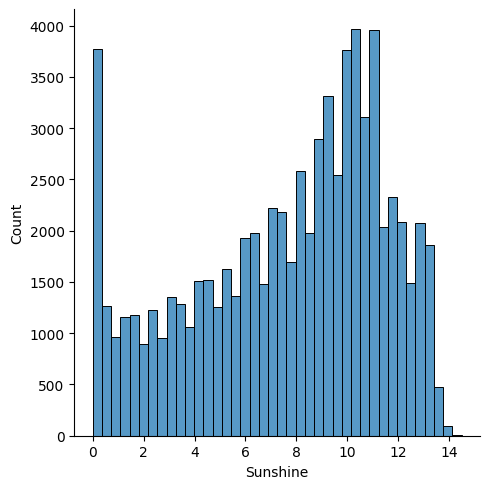

In [536]:
sns.displot(df['Sunshine'].dropna(), kde=False, bins=40)

In [537]:
print("Median:", df['Sunshine'].median(), "Mean:", df['Sunshine'].mean())

Median: 8.5 Mean: 7.624853113193594


In [538]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_filled = imputer.fit_transform(df[['Sunshine']])
# #df['Sunshine'] = df_filled
# sns.displot(df_filled, kde=False, bins=40)


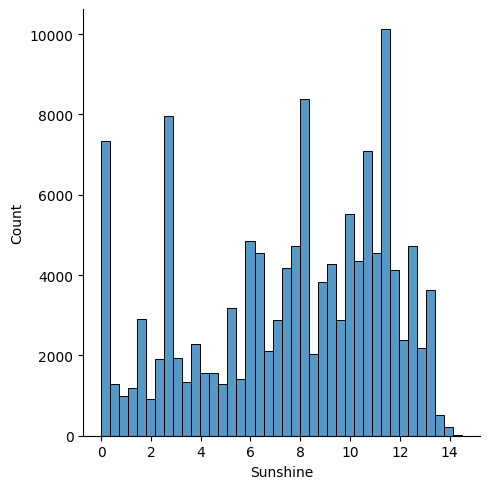

In [539]:
df_to_fill = df['Sunshine'].copy()
df_to_fill = df_to_fill.interpolate(method='nearest', limit_direction='both')
sns.displot(df_to_fill, kde=False, bins=40)

## Filling missing values

<Axes: >

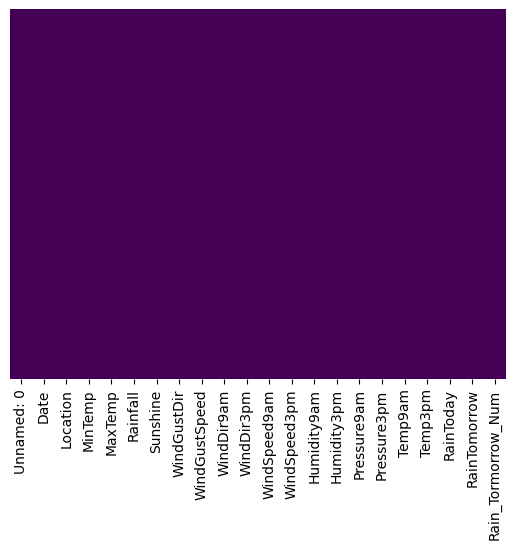

In [540]:
df['Sunshine'] = df_to_fill
for col in df.columns:
    if col == 'Date' or col == 'Location' or col == 'RainTomorrow' or col== 'Unnamed: 0':
        continue
    
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

df_filled = df

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Analyze outliers

In [541]:

#df['Rain_Tomorrow_Num'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df = df.drop(columns=['RainTomorrow'])
df['RainToday_Num'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df = df.drop(columns=['RainToday'])

df_num = df.select_dtypes(include = ['float64', 'int64'])

df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Rain_Tormorrow_Num,RainToday_Num
0,0,2008-12-01,Albury,13.4,22.9,0.6,7.587814,W,44.0,W,...,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,2008-12-02,Albury,7.4,25.1,0.0,7.587814,WNW,44.0,NNW,...,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2,2008-12-03,Albury,12.9,25.7,0.0,7.587814,WSW,46.0,W,...,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,3,2008-12-04,Albury,9.2,28.0,0.0,7.587814,NE,24.0,SE,...,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,4,2008-12-05,Albury,17.5,32.3,1.0,7.587814,W,41.0,ENE,...,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


<Axes: xlabel='outlier', ylabel='count'>

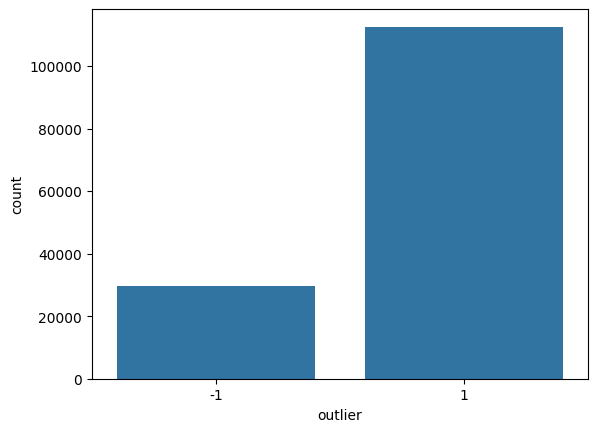

In [542]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(df_num)
y_pred_outliers = clf.predict(df_num)
df['outlier'] = y_pred_outliers
df['outlier'].value_counts()

sns.countplot(x='outlier', data=df)


In [543]:
df = df[df['outlier'] != -1]
df = df.drop(columns=['outlier'])

df.head()
df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Rain_Tormorrow_Num,RainToday_Num
count,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000
mean,71028.975373,11.953868,23.625734,0.595303,7.926513,38.111222,13.269986,18.096337,66.972385,48.279998,1018.502490,1015.971929,17.056657,22.141322,0.126183,0.109978
std,40828.438936,5.932585,6.239139,2.002933,3.495285,10.832426,7.890691,7.855811,17.462924,18.031764,5.869258,5.839696,5.805691,5.996971,0.332057,0.312864
min,0.000000,-8.200000,-1.300000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,988.800000,986.900000,-2.700000,-1.600000,0.000000,0.000000
25%,35249.500000,7.700000,18.900000,0.000000,6.000000,31.000000,7.000000,13.000000,56.000000,35.000000,1014.800000,1012.200000,12.800000,17.650000,0.000000,0.000000
50%,71511.000000,11.900000,23.100000,0.000000,8.100000,37.000000,13.000000,17.000000,68.000000,50.000000,1017.653758,1015.258204,16.900000,21.687235,0.000000,0.000000
75%,106742.500000,16.200000,28.100000,0.200000,10.700000,44.000000,19.000000,22.000000,79.000000,61.000000,1022.200000,1019.700000,21.200000,26.300000,0.000000,0.000000
max,142192.000000,29.700000,45.100000,40.000000,14.500000,120.000000,83.000000,83.000000,100.000000,100.000000,1040.900000,1038.500000,35.700000,42.700000,1.000000,1.000000


In [544]:
df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Rain_Tormorrow_Num,RainToday_Num
count,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000,112559.000000
mean,71028.975373,11.953868,23.625734,0.595303,7.926513,38.111222,13.269986,18.096337,66.972385,48.279998,1018.502490,1015.971929,17.056657,22.141322,0.126183,0.109978
std,40828.438936,5.932585,6.239139,2.002933,3.495285,10.832426,7.890691,7.855811,17.462924,18.031764,5.869258,5.839696,5.805691,5.996971,0.332057,0.312864
min,0.000000,-8.200000,-1.300000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,988.800000,986.900000,-2.700000,-1.600000,0.000000,0.000000
25%,35249.500000,7.700000,18.900000,0.000000,6.000000,31.000000,7.000000,13.000000,56.000000,35.000000,1014.800000,1012.200000,12.800000,17.650000,0.000000,0.000000
50%,71511.000000,11.900000,23.100000,0.000000,8.100000,37.000000,13.000000,17.000000,68.000000,50.000000,1017.653758,1015.258204,16.900000,21.687235,0.000000,0.000000
75%,106742.500000,16.200000,28.100000,0.200000,10.700000,44.000000,19.000000,22.000000,79.000000,61.000000,1022.200000,1019.700000,21.200000,26.300000,0.000000,0.000000
max,142192.000000,29.700000,45.100000,40.000000,14.500000,120.000000,83.000000,83.000000,100.000000,100.000000,1040.900000,1038.500000,35.700000,42.700000,1.000000,1.000000


## Feature selection

In [545]:
# first considering only numerical data
df = df.drop(columns=['Date', 'Location'])
df_num = df.select_dtypes(include = ['float64', 'int64'])

df_corrs = df_num.corrwith(df_num['Rain_Tormorrow_Num']).sort_values(ascending=False)



In [546]:
print(df_corrs)

Rain_Tormorrow_Num    1.000000
Humidity3pm           0.302696
Humidity9am           0.143372
WindGustSpeed         0.127319
MinTemp               0.065851
RainToday_Num         0.060289
Rainfall              0.050787
WindSpeed3pm          0.042749
WindSpeed9am          0.021283
Temp9am              -0.001108
Unnamed: 0           -0.008644
MaxTemp              -0.100588
Temp3pm              -0.125227
Pressure3pm          -0.154524
Pressure9am          -0.156918
Sunshine             -0.180979
dtype: float64


<Axes: >

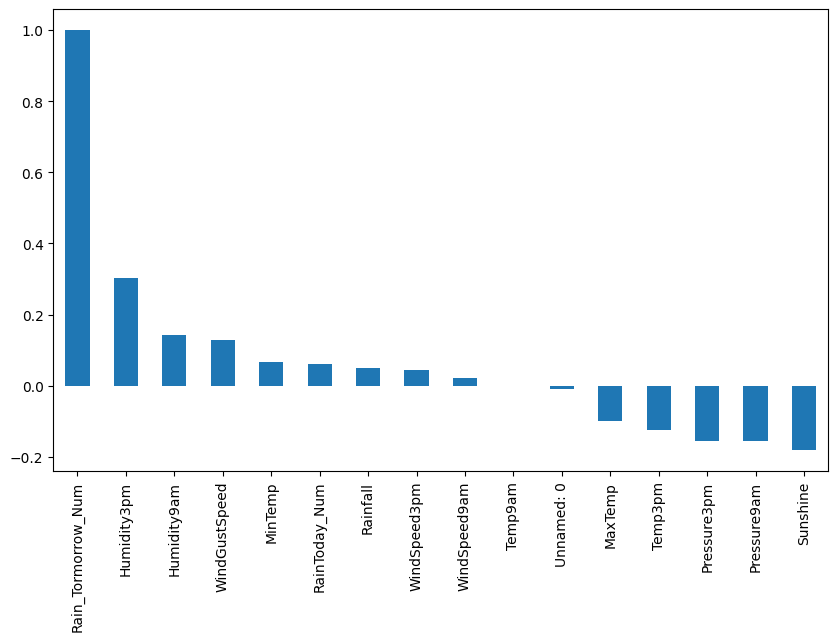

In [547]:
df_corrs.plot(kind='bar', figsize=(10, 6))

In [548]:
cols_to_drop = df_corrs[(df_corrs >= -0.1) & (df_corrs <= 0.1)].index
print(cols_to_drop)

Index(['MinTemp', 'RainToday_Num', 'Rainfall', 'WindSpeed3pm', 'WindSpeed9am',
       'Temp9am', 'Unnamed: 0'],
      dtype='object')


In [549]:
# drop numerical columns with low correlation
df = df.drop(columns=cols_to_drop)

In [550]:
save = df.to_csv('../data/weather_cleaned_preprocessed.csv')

In [551]:
df.head()

,MaxTemp,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,Rain_Tormorrow_Num
0,22.9,7.587814,W,44.0,W,WNW,71.0,22.0,1007.7,1007.1,21.8,0
1,25.1,7.587814,WNW,44.0,NNW,WSW,44.0,25.0,1010.6,1007.8,24.3,0
2,25.7,7.587814,WSW,46.0,W,WSW,38.0,30.0,1007.6,1008.7,23.2,0
3,28.0,7.587814,NE,24.0,SE,E,45.0,16.0,1017.6,1012.8,26.5,0
4,32.3,7.587814,W,41.0,ENE,NW,82.0,33.0,1010.8,1006.0,29.7,0
